# Data Viz: Presentation Style

## Imports

In [1]:
# import data
import pickle

# data manipulation
import pandas as pd
from datetime import datetime

# plotting and viz
import matplotlib.pyplot as plt
import seaborn as sns

# maps
import plotly.express as px
import pydeck as pdk

# interactivity
from ipywidgets import interact

## Prepping Data: Import & Sampling

In [2]:
pickle_path = ('../raw_data/viz.pickle')

with open(pickle_path, 'rb') as f:
    data = pickle.load(f)

In [3]:
inf = data['period'] > datetime(2016, 1, 1, 0, 0, 0)
sup = data['period'] < datetime(2019, 1, 1, 0, 0, 0)
df = data[ inf & sup ]

In [4]:
df.shape

(1424617, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1424617 entries, 2 to 6983206
Data columns (total 24 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   precinct_number  1424617 non-null  int64  
 1   offense_type     1424617 non-null  object 
 2   crime_completed  1424617 non-null  object 
 3   offense_level    1424617 non-null  object 
 4   premise_desc     1424617 non-null  object 
 5   premise          1424617 non-null  object 
 6   jurisdiction     1424617 non-null  object 
 7   park_name        1424617 non-null  object 
 8   suspect_age      1424617 non-null  object 
 9   suspect_race     1424617 non-null  object 
 10  suspect_sex      1424617 non-null  object 
 11  latitude         1424617 non-null  float64
 12  longitude        1424617 non-null  float64
 13  metro            1424617 non-null  object 
 14  victim_age       1424617 non-null  object 
 15  victim_race      1424617 non-null  object 
 16  victim_sex       1

## Viz over Time

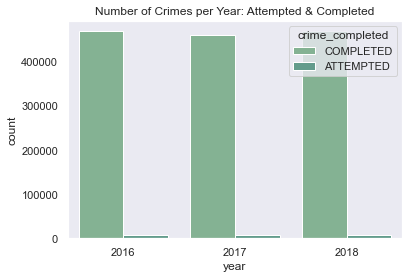

In [22]:
# Number of Crimes per Year
sns.countplot(x = 'year', hue = 'crime_completed', data = df, palette = sns.color_palette('crest'))
plt.title('Number of Crimes per Year: Attempted & Completed');

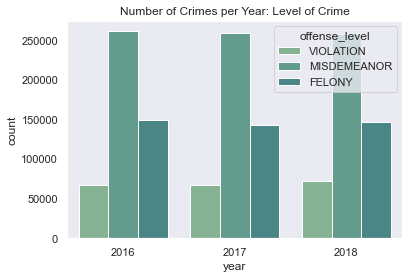

In [21]:
# Number of Crimes per Year
sns.countplot(x = 'year', hue = 'offense_level', data = df, palette = sns.color_palette('crest'))
plt.title('Number of Crimes per Year: Level of Crime');

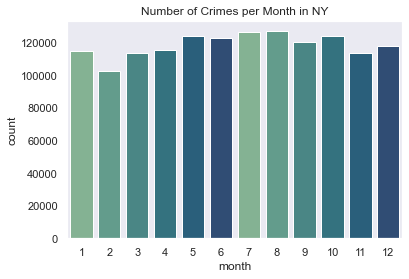

In [23]:
# Number of Crimes per Month
sns.countplot(x = 'month', data = df, palette = sns.color_palette('crest'))
plt.title('Number of Crimes per Month in NY');

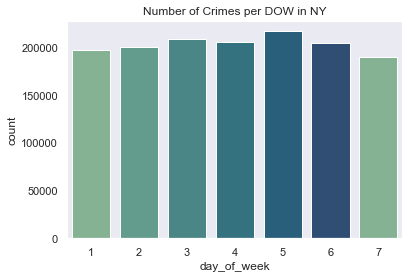

In [24]:
# Number of Crimes per Month
sns.countplot(x = 'day_of_week', data = df, palette = sns.color_palette('crest'))
plt.title('Number of Crimes per DOW in NY');

## Comparing Crime over the Years

In [35]:
# Group by Year

year_df = df.groupby(['year'], as_index = False).count()
yearly = year_df[['year', 'crime_completed']].rename(columns = {'crime_completed': 'number_of_crimes'})

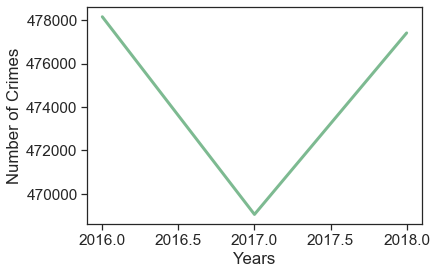

In [64]:
# Line graph to represent overall drop in crime over the years

sns.set(style = 'ticks', palette = 'crest', font_scale = 1.4, rc = {'lines.linewidth': 3})

sns.lineplot(data = yearly, x = 'year', y = yearly['number_of_crimes'])\
                                .set(xlabel = 'Years', ylabel = 'Number of Crimes');

In [32]:
# Group by Year and Month

time = df.groupby(['year', 'month'], as_index = False).count()

crime_ym = time[['year', 'month', 'crime_completed']].rename(columns = {'crime_completed': 'number_of_crimes'})

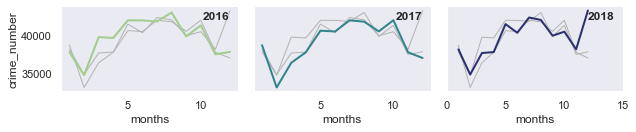

In [33]:
sns.set_theme(style = 'dark')

# Plot each year's time series in its own facet
g = sns.relplot(
    data = crime_ym,
    x = 'month', y = 'number_of_crimes', col = 'year', hue = 'year',
    kind = 'line', palette = 'crest', linewidth = 2, zorder = 5,
    col_wrap = 3, height = 2, aspect = 1.5, legend = False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform = ax.transAxes, fontweight = 'bold')

    # Plot every year's time series in the background
    sns.lineplot(
        data = crime_ym, x = 'month', y = 'number_of_crimes', units = 'year',
        estimator = None, color = '.7', linewidth = 1, ax = ax
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles('')
g.set_axis_labels('months', 'crime_number')
g.tight_layout()

## Crime Level per Borough

In [67]:
# group by: crime level & borough

level = df.groupby(['offense_level', 'borough', 'year', 'month'], as_index = False).count()

borough = level[['offense_level', 'borough', 'year', 'month', 'crime_completed']]\
                    .rename(columns = {'crime_completed': 'number_of_crimes'})

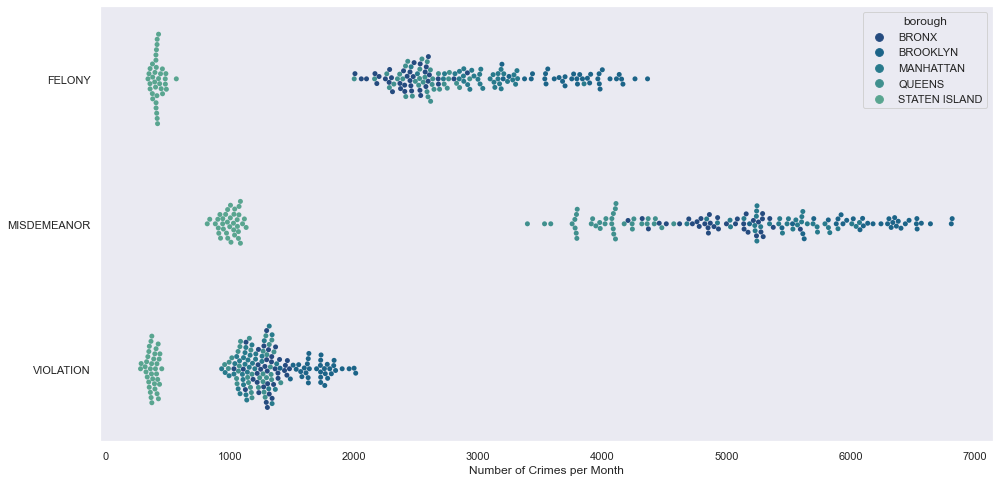

In [68]:
# categorical scatterplot to show no. of crimes per borough per level of crime

fig, ax = plt.subplots(figsize = (16, 8))

sns.set_theme(style = 'dark', palette = 'crest_r')

swarm = sns.swarmplot(data = borough,
                      x = 'number_of_crimes',
                      y = 'offense_level',
                      hue = 'borough',
                      size = 5,
                      ax = ax)

swarm.set(ylabel = '')
swarm.set(xlabel = 'Number of Crimes per Month');

## Heatmap

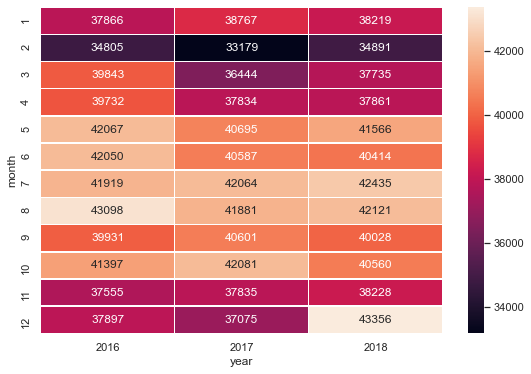

In [81]:
sns.set_theme()

# converting group by year & month to long-form
crime_pivot = crime_ym.pivot('month', 'year', 'number_of_crimes')

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize = (9, 6))

sns.heatmap(crime_pivot, annot = True, fmt = 'd', linewidths = .5, ax = ax);